In [20]:
from adaline import *
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [21]:
train = pd.read_csv('../perceptron-train.csv',names=['target','col1','col2'])
test = pd.read_csv('../perceptron-test.csv',names=['target','col1','col2'])

In [22]:
train['col2'] = (train['col2'] - train['col2'].mean()) / train['col2'].std()

test['col2'] = (test['col2'] - test['col2'].mean()) / test['col2'].std()

In [23]:
test.head()

,target,col1,col2
0,-1.0,1.651437,1.220010
1,1.0,-0.866495,1.083781
2,-1.0,0.789828,-0.469184
3,-1.0,0.179549,1.799168
4,1.0,-0.434351,0.503610


In [24]:
x_train = train[['col1','col2']].to_numpy()
y_train = train['target'].to_numpy().reshape(-1,1)

x_test = test[['col1','col2']].to_numpy()
y_test = test['target'].to_numpy().reshape(-1,1)

In [25]:
x_train.size

600

In [26]:
x_train.shape

(300, 2)

In [41]:
clf = Adaline(taxa_aprendizado=1e-3,tolerancia=1e-20)

clf.fit(x_train,y_train)

y_hat = clf.predict(x_test)

Peso Epoch 1: [-0.69381578 -0.02352022  0.21970345] Erro quadratico: [2.0000242]
Peso Epoch 2: [-0.47746275 -0.1783111   0.02747401] Erro quadratico: [1.27215908]
Peso Epoch 3: [-0.32464481 -0.28320019 -0.10339332] Erro quadratico: [0.60725354]
Peso Epoch 4: [-0.21674335 -0.35431465 -0.19249842] Erro quadratico: [0.2903022]
Peso Epoch 5: [-0.14058254 -0.40255855 -0.25317601] Erro quadratico: [0.13898365]
Peso Epoch 6: [-0.08684272 -0.4353076  -0.29449999] Erro quadratico: [0.0666332]
Peso Epoch 7: [-0.04893483 -0.45755307 -0.32264605] Erro quadratico: [0.03198976]
Peso Epoch 8: [-0.0222023  -0.47267429 -0.34181803] Erro quadratico: [0.01537813]
Peso Epoch 9: [-0.00335561 -0.4829604  -0.35487802] Erro quadratico: [0.00740196]
Peso Epoch 10: [ 0.00992816 -0.48996286 -0.36377488] Erro quadratico: [0.00356714]
Peso Epoch 11: [ 0.01928882 -0.49473377 -0.3698358 ] Erro quadratico: [0.00172108]
Peso Epoch 12: [ 0.02588353 -0.49798706 -0.37396475] Erro quadratico: [0.00083132]
Peso Epoch 13: [

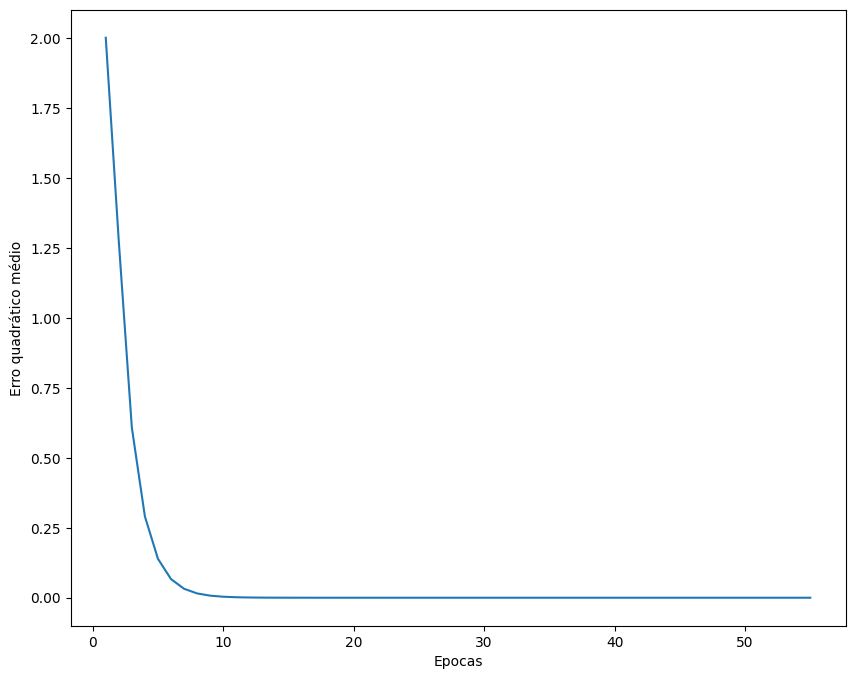

In [42]:
epocas = np.array(list(clf.histerr.keys()))
erro_quadratico_por_epoca = np.array(list(clf.histerr.values()))
plt.figure(figsize=(10,8))
plt.ylabel('Erro quadrático médio')
plt.xlabel('Epocas')
plt.plot(epocas, erro_quadratico_por_epoca)
plt.savefig('Error per epoch.png')



In [43]:
accuracy_score(y_train, clf.predict(x_train)) ,accuracy_score(y_test,y_hat)

(0.8733333333333333, 0.9)

In [44]:
c1= np.linspace(-3,3,1000)
c2 = (-c1 * clf.pesos[1]/clf.pesos[2]) + clf.pesos[0]

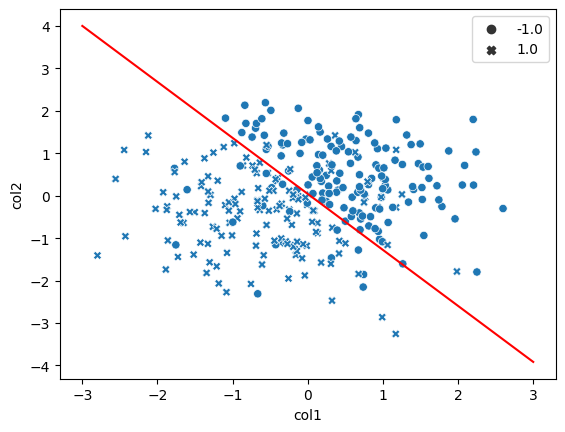

In [45]:
sns.scatterplot(data = train, x='col1',y='col2',style='target')
sns.lineplot(x=c1,y=c2,color='red')
plt.savefig('Best result, acc_test: 0.87 and acc_train: 0.9.png')

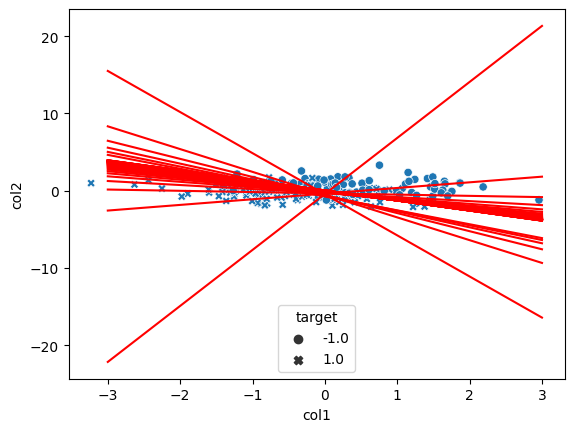

In [33]:
for x in range(3,50):
    peso = clf.histpeso[f"{x}"]
    c1= np.linspace(-3,3,1000)
    c2 = (-c1 * peso[1]/peso[2]) + peso[0]
    sns.lineplot(x=c1,y=c2,color='red')
sns.scatterplot(data = test, x='col1',y='col2',style='target')
plt.savefig('Training.png')    